# Multinomial Logistic Regression Forecasting Model

### Steps:
1. **Dataset Information Gathering**
   - Explore the dataset and understand the available features.
   - Identify potential target and predictor variables for the model.
   - Check for missing values, data types, and overall structure.

2. **Data Cleaning**
     - Handle missing values
     - Encode categorical variables into numeric format where necessary (e.g., gender, race).
     - Normalize or scale features if required.

3. **Data Visualization**
   - Visualize relationships between predictors and the target variable.
   - Use histograms, box plots, and scatter plots to understand distributions.
   - Correlation heatmaps to check for multi collinearity.

4. **TensorFlow Model Training**
   - **Multinomial Logistic Regression Forecasting Model**:
     - Split the data into training and testing sets.
     - Build and compile a neural network model for multinomial logistic regression using TensorFlow.
     - Train the model on the training set.
5. **Evaluation and Scoring**
   - Evaluate the model on the test set and visualize the results.
       
   
### Goal
The objective of this project is to develop a Multinomial Logistic Regression model that predicts a person's vision status (Normal Vision, Visual Impairment, Blindness) based on demographic and health-related factors

**Example**:
#### **Input:**
| Age  | Gender | RiskFactor (Diabetes) | RiskFactor (Smoking) | RiskFactorResponse (Hypertension) |
|------|--------|-----------------------|----------------------|-----------------------------------|
| 50   | Male   | Yes                   | No                   | Yes                               |

#### **Output (Vision Status Prediction)**:
| Vision Status | Probability   |
|---------------|---------------|
| Normal vision | 0.60          |
| Visual impairment | 0.25      |
| Blindness     | 0.15          |


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/National_Health_and_Nutrition_Examination_Survey_Vision_and_Eye_Health_Surveillance.csv", low_memory=True)

### Make a rough overview of all the Data

In [133]:
df.describe()

,YearStart,YearEnd,Data_Value,Low_Confidence_limit,High_Confidence_Limit,Numerator,Sample_Size,LocationID,DataValueTypeID,GeoLocation,Geographic Level
count,10320.000000,10320.0,6328.000000,6328.000000,6328.000000,0.0,8639.000000,10320.0,0.0,0.0,0.0
mean,2001.162791,2008.0,23.670702,20.277276,27.117668,NaN,1236.882278,59.0,NaN,NaN,NaN
std,2.880952,0.0,31.245569,30.055377,32.022886,NaN,2400.059894,0.0,NaN,NaN,NaN
min,1999.000000,2008.0,0.000000,0.000000,0.000000,NaN,30.000000,59.0,NaN,NaN,NaN
25%,1999.000000,2008.0,3.400000,2.200000,4.800000,NaN,155.000000,59.0,NaN,NaN,NaN
50%,1999.000000,2008.0,10.800000,7.700000,14.100000,NaN,453.000000,59.0,NaN,NaN,NaN
75%,2005.000000,2008.0,25.000000,17.700000,33.100000,NaN,1265.500000,59.0,NaN,NaN,NaN
max,2005.000000,2008.0,100.000000,99.300000,100.000000,NaN,35090.000000,59.0,NaN,NaN,NaN


### List of all Rows and there DataType

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   10320 non-null  int64  
 1   YearEnd                     10320 non-null  int64  
 2   LocationAbbr                10320 non-null  object 
 3   LocationDesc                10320 non-null  object 
 4   DataSource                  10320 non-null  object 
 5   Topic                       10320 non-null  object 
 6   Category                    10320 non-null  object 
 7   Question                    10320 non-null  object 
 8   Response                    10320 non-null  object 
 9   Age                         10320 non-null  object 
 10  Gender                      10320 non-null  object 
 11  RaceEthnicity               10320 non-null  object 
 12  RiskFactor                  10320 non-null  object 
 13  RiskFactorResponse          103

### List of First 5 Rows

In [135]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Category,Question,Response,Age,...,QuestionID,ResponseID,DataValueTypeID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID,GeoLocation,Geographic Level
0,2005,2008,US,National,NHANES,Visual Function,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,...,NHBL,RYES,NaN,AGEALL,GF,ALLRACE,RFDM,RFNO,NaN,NaN
1,1999,2008,US,National,NHANES,Visual Function,Measured Visual Acuity,Best-corrected visual acuity,Visual impairment,40-64 years,...,QVISA,RVIMP,NaN,AGE4064,GALL,OTH,RFSM,RFYES,NaN,NaN
2,1999,2008,US,National,NHANES,Visual Function,Measured Visual Acuity,Best-corrected visual acuity,US-defined blindness,12-17 years,...,QVISA,RVUSB,NaN,AGE1217,GM,OTH,RFDM,RFNO,NaN,NaN
3,2005,2008,US,National,NHANES,Visual Function,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,...,NHBL,RYES,NaN,AGEALL,GF,OTH,RFDM,RFYES,NaN,NaN
4,2005,2008,US,National,NHANES,Visual Function,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,18-39 years,...,NHBL,RYES,NaN,AGE1839,GF,BLK,RFDM,RFNO,NaN,NaN


### Percentage of Values that are Null

In [136]:
round(df.isnull().sum().sum() / df.count().sum(), 3)

0.222

### Check for Duplicate values

In [137]:
df.duplicated().sum()

0

### Data Cleaning 

**Rows to remove for Multinomial Logistic Regression to predicting vision status**
- YearStart
- YearEnd
- LocationDesc
- DataSource
- TopicType
- Data_Value_Unit
- DataValueTypeID
- Data_Value_Alt
- GeoLocation
- LowConfidenceLimit
- HighConfidenceLimit
- Sample_Size
- Data_Value_Footnote_Symbol
- Data_Value_Footnote
- ResponseID
- QuestionID
- StratificationID


In [138]:
df.drop(columns=['YearStart', 'YearEnd', 'LocationDesc', 'DataSource', 'Topic', 
                 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'GeoLocation', 
                 'Low_Confidence_limit', 'High_Confidence_Limit', 'Sample_Size', 
                 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'ResponseID',
                 'QuestionID', 'LocationAbbr', 'Numerator', 'LocationID', 'RiskFactorID', 'RiskFactorResponseID',  'Geographic Level',
                 'Data_Value','TopicID','CategoryID','AgeID','GenderID', 'RaceEthnicityID', 'RaceEthnicity'
                 ], inplace=True)

# Remove Data that has not the Question "Percentage of people blind in both eyes", "Percentage of people with visual impairment", "Percentage of people with normal vision"


## Print Cleaned Data

In [139]:
df.head()

,Category,Question,Response,Age,Gender,RiskFactor,RiskFactorResponse
0,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,Female,Diabetes,No
1,Measured Visual Acuity,Best-corrected visual acuity,Visual impairment,40-64 years,All genders,Smoking,Yes
2,Measured Visual Acuity,Best-corrected visual acuity,US-defined blindness,12-17 years,Male,Diabetes,No
3,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,Female,Diabetes,Yes
4,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,18-39 years,Female,Diabetes,No


### Unique Questions

In [140]:
df["Question"].unique()

array(['Percentage of people blind in both eyes',
       'Best-corrected visual acuity',
       'Percentage of people with diabetic retinopathy, based on examination',
       'Percentage of people who had a cataract operation',
       'Presenting visual acuity',
       'Percentage of people ever told by an eye doctor they have glaucoma',
       'Percentage of people who were ever told by an eye doctor they have age-related macular degeneration',
       'Percentage of people with age-related macular degeneration, based on examination',
       'Uncorrected Refractive Error (URE)',
       'Percentage of people with glaucoma, based on examination',
       'Percentage of people who were ever told by an eye doctor their diabetes affected their eyes'],
      dtype=object)

### Unique Answers to "Presenting visual acuity"

In [141]:
df[df['Question'] == 'Presenting visual acuity']['Response'].unique()

array(['Presenting with visual impairment',
       'Presenting with US-defined blindness',
       'Presenting with normal vision', 'Presenting with any vision loss',
       'Presenting with monocular vision loss'], dtype=object)

### Unique Answers to "Best-corrected visual acuity"

In [142]:
df[df['Question'] == 'Best-corrected visual acuity']['Response'].unique()

array(['Visual impairment', 'US-defined blindness', 'Normal vision',
       'Any vision loss', 'Monocular vision loss'], dtype=object)

### Save Cleaned Data

In [143]:
df.to_csv(r'data/Vision_Survey_Cleaned.csv', header=True, index=False)

### Data Visualization
* Age Distribution of People that smokes
* Age Distribution of People that have Diabetes
* Age Distribution of People that have Hypertension

## Distribution of People that smokes

Text(0.5, 1.0, 'Age Distribution of Smokers')

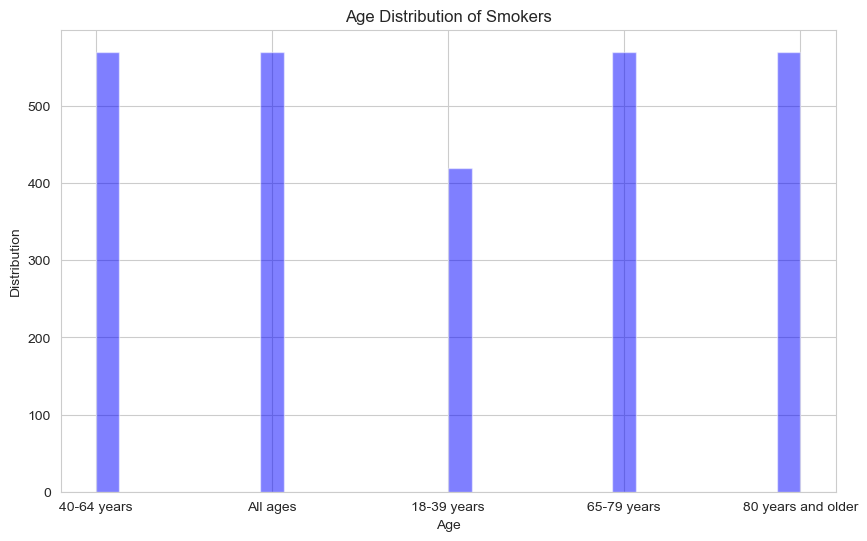

In [144]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['RiskFactor'] == 'Smoking']['Age'], bins=30, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Age Distribution of Smokers')

Age Distribution of People that have Diabetes

Text(0.5, 1.0, 'Age Distribution of Diabetes')

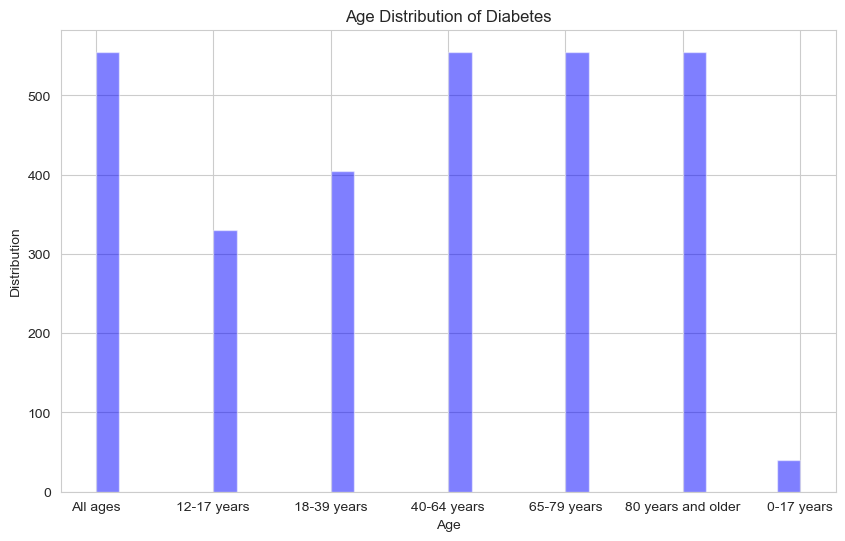

In [145]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['RiskFactor'] == 'Diabetes']['Age'], bins=30, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Age Distribution of Diabetes')

### Age Distribution of People that have Hypertension

Text(0.5, 1.0, 'Age Distribution of Hypertension')

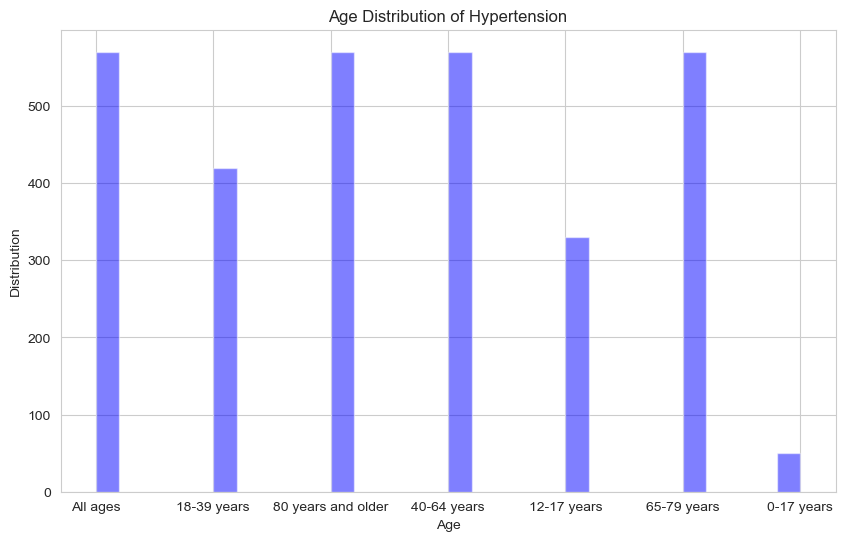

In [146]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['RiskFactor'] == 'Hypertension']['Age'], bins=30, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Age Distribution of Hypertension')

### Merged Data Visualization from above

* How many smokers have Diabetes and Hypertension
* How many people with Diabetes have Hypertension
* How many have Diabetes and Hypertension



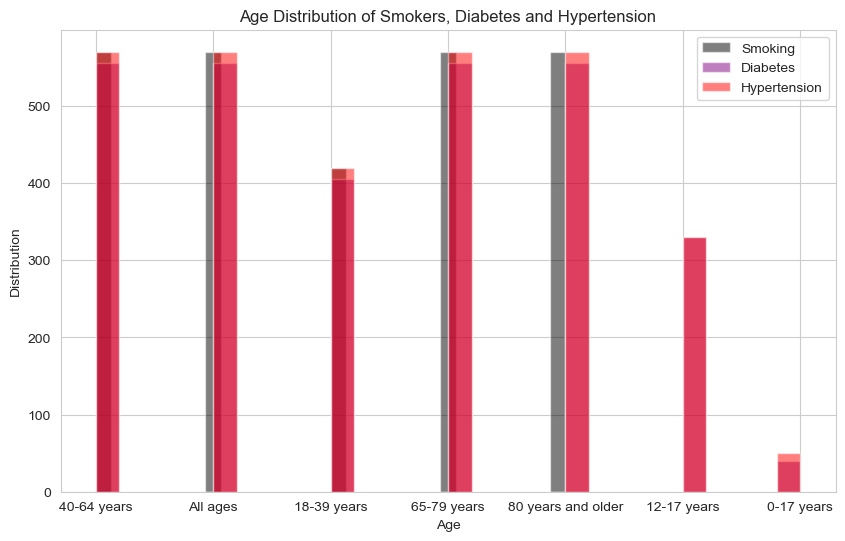

In [147]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['RiskFactor'] == 'Smoking']['Age'], bins=30, color='black', alpha=0.5, label='Smoking')
plt.hist(df[df['RiskFactor'] == 'Diabetes']['Age'], bins=30, color='purple', alpha=0.5, label='Diabetes')
plt.hist(df[df['RiskFactor'] == 'Hypertension']['Age'], bins=30, color='red', alpha=0.5, label='Hypertension')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Age Distribution of Smokers, Diabetes and Hypertension')
plt.legend()




### Show the Distribution of the Vision Status of People that have Diabetes

Text(0.5, 1.0, 'Vision Status of People with Diabetes')

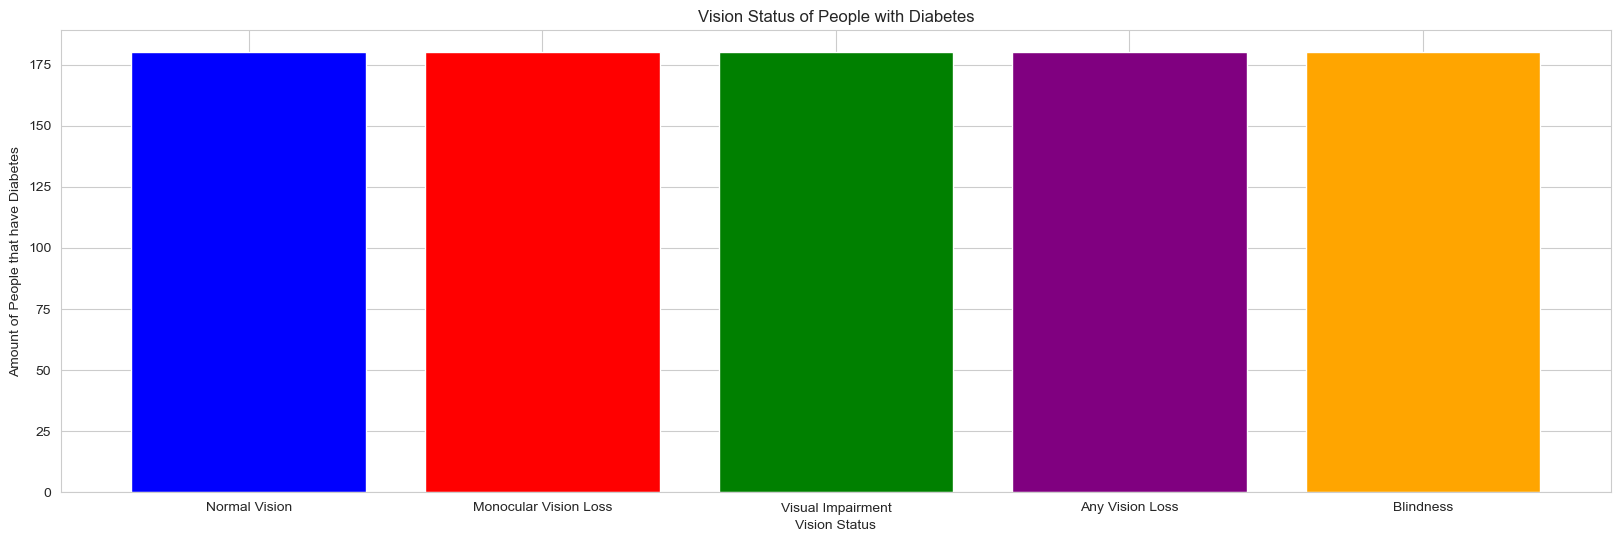

In [148]:
plt.figure(figsize=(20, 6))
x = ['Normal Vision', 'Monocular Vision Loss', 'Visual Impairment', 'Any Vision Loss', 'Blindness']

### Count each aspected Vision Status
d_normal_vision = df[(df['RiskFactor'] == 'Diabetes') & (df['Question'] == 'Presenting visual acuity') & (df['Response'] == 'Presenting with normal vision')]['Response']
d_monocular_vision_loss = df[(df['RiskFactor'] == 'Diabetes') & (df['Question'] == 'Presenting visual acuity') & (df['Response'] == 'Presenting with monocular vision loss')]['Response']
d_impairment_vision = df[(df['RiskFactor'] == 'Diabetes') & (df['Question'] == 'Presenting visual acuity') & (df['Response'] == 'Presenting with visual impairment')]['Response']
d_any_vision_loss = df[(df['RiskFactor'] == 'Diabetes') & (df['Question'] == 'Presenting visual acuity') & (df['Response'] == 'Presenting with any vision loss')]['Response']
d_with_blindness = df[(df['RiskFactor'] == 'Diabetes') & (df['Question'] == 'Presenting visual acuity') & (df['Response'] == 'Presenting with US-defined blindness')]['Response']

### Make the Bar Plot give them different colors
plt.bar(x, [d_normal_vision.count(), d_monocular_vision_loss.count(), d_impairment_vision.count(), d_any_vision_loss.count(), d_with_blindness.count()], color=['blue', 'red', 'green', 'purple', 'orange'])

plt.xlabel('Vision Status')
plt.ylabel('Amount of People that have Diabetes')
plt.title('Vision Status of People with Diabetes')


### Pattern 

* Every Vision Status 